# 演習９　離散勾配作用素$D$と$D^\top$の計算

## 課題
画像に対して，２次元離散勾配作用素$D:\mathbb{R}^N\rightarrow \mathbb{R}^{2N}$および$D^\top:\mathbb{R}^{2N}\rightarrow \mathbb{R}^{N}$の計算を行う関数を定義せよ．$D$の定義は配布資料を参照．$D^\top$の定義は下記の$\mathrm{div}$の出力の**符号を反転したもの**である（$D^\top=-\mathrm{div}$）．この定義では画像サイズを$N\times N$としていて，講義資料中の$N$とは異なることに注意．


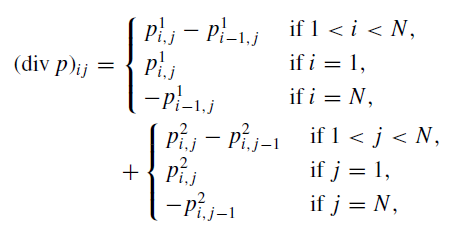


## ヒント
* ランダムに作った$x\in \mathbb{R}^N$と$y\in \mathbb{R}^{2N}$について，$<Dx,y>=<x,D^\top y>$が(数値計算による誤差を除いて)成立していることを確認すればよい．（画像としてのサイズは$x\in \mathbb{R}^{h\times w}$，$y\in \mathbb{R}^{h\times w \times 2}$などであることに注意）

## ついでに知っておくとよいこと
* $D$は$\mathrm{grad}$に，$D^\top$は$\mathrm{div}$に対応している．すなわち$D^\top D$は$\mathrm{div \cdot grad}$であり，ラプラシアン$\Delta$に対応している．実際$D^\top D$を画像に作用させることは離散のラプラシアンフィルタと対応している．
* `np.concatenate`は２つの多次元配列を連結して一つの多次元配列をつくる関数である．もちろん，どの次元について連結を行うかを明記する必要がある．
* `np.dstack`は2次元配列を3次元方向にスタックする関数である．

In [ ]:
!git clone https://github.com/mdipcit/standard_images/

Cloning into 'standard_images'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
cd standard_images/

/content/standard_images


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [ ]:
im= np.asarray(Image.open('pepper.png')).astype(float)/255.0

In [ ]:
def D(im):
    h, w = im.shape 
    dh = np.vstack([im[1:, :] - im[0:-1, :], np.zeros([1, w])]) 
    dw = np.hstack([im[:, 1:] - im[:, 0:-1], np.zeros([h, 1])]) 
    return np.dstack([dh, dw])


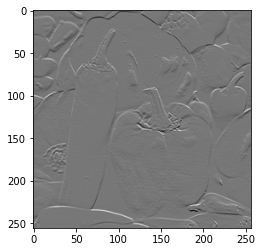

In [ ]:
p=D(im)
plt.imshow(p[:,:,0], cmap='gray')

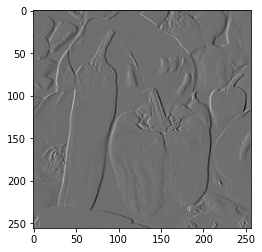

In [ ]:
plt.imshow(p[:,:,1], cmap='gray')

In [ ]:
#check 
h=16
w=16
x = np.random.randn(h, w)
y = np.random.randn(h, w, 2)

print(np.sum(y * D(x),  axis = None))
#print(np.sum(x * Dt(y), axis = None)) #Dtを実装したらこれのコメントをはずす

13.059350454435064
